In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
from sklearn import datasets

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76

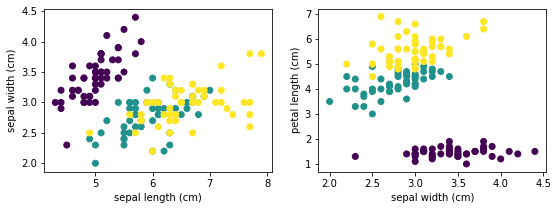

In [3]:
# load iris dataset: 3 classes, 4 features, 50 samples

iris = datasets.load_iris()
print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i], data[:,i+1], c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])
plt.show()

<div class="alert alert-info" role="alert">
    <h1>DATA PREPROCESSING</h1>
</div>

In [4]:
# split dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2 ,random_state=4)

In [5]:
# shape of train and test objects

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [6]:
# shape of new y objects

print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

### Knn model - 1st use

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
# Instantiating the CLASSIFIER

knn = KNeighborsClassifier(n_neighbors = 5)

# fit the model with data, TRAINING 

knn.fit(X_train, y_train)

# Predict the response for observations being passed, here 'X-test'

y_pred_test = knn.predict(X_test)

# getting the testing accuracy of KNN (K=5)

print ('ACCURACY:',metrics.accuracy_score(y_test, y_pred_test))
print ('CONFUSION MATRIX\n',metrics.confusion_matrix(y_test, y_pred_test))

ACCURACY: 0.9666666666666667
CONFUSION MATRIX
 [[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


### Knn model - 2nd use

Text(0, 0.5, 'Testing Accuracy')

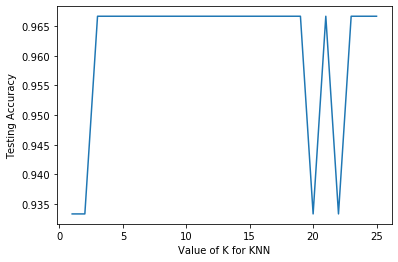

In [9]:
# running from k=1 through 25 and record testing accuracy

k_range = range(1,26)
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred_test=knn.predict(X_test)
        scores_list.append(metrics.accuracy_score(y_test,y_pred_test))


# plot the accuracy with different value of k

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Knn model - 3rd use

In [10]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [11]:
# Determines the cross-validation splitting strategy. 
'''
Possible inputs for cv are:
-None, to use the default 5-fold cross validation
'''

k_range = range(1, 26)
cv_results = []
mean_cv_results = []
cv=5
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # add to the list cv_result the accuracy given by cross_val_score
        #compute by using kFold for training
        cv_results.append(model_selection.cross_val_score(knn, 
                                                          data, 
                                                          labels,
                                                          cv=cv,
                                                          scoring='accuracy'))
        #print (cv_results[k-1])
        mean_cv_results.append(cv_results[k-1].mean())
print (f'lowest k with max accuracy is {mean_cv_results.index(max(mean_cv_results))+1}')
print (f'for k={mean_cv_results.index(max(mean_cv_results))+1} the mean accuracy of {cv}-fold is {max(mean_cv_results)}')

# create a k-nn with previous pars and fit it with use kNN with the best k but fit with hold-method

knn = KNeighborsClassifier(n_neighbors=mean_cv_results.index(max(mean_cv_results))+1)
#print ('size data',data.shape)
#print ('size data',labels.shape)

#concatenate data and label

data_and_labels=np.append(data, labels[:,None], axis=1)
#print (data_and_labels.shape)

#randomize

np.random.shuffle(data_and_labels)

#hold 4/5 dataset as train

train = data_and_labels[0:4*int(len(data_and_labels)/5)]

#hold 1/5 dataset as test 

test = data_and_labels[(4*int(len(data_and_labels)/5)):]

# train the model with training  vector

train_features=train[:,0:4]
train_lables=train[:,4]
knn.fit(train_features, train_lables)

# test

test_features=test[:,0:4]
test_lables=test[:,4]
test_labels_predict= knn.predict(test[:,0:4])

# compute metrics and show them

print("\naccuracy",accuracy_score(test_lables,test_labels_predict))
print("confusion_matrix\n",confusion_matrix(test_lables,test_labels_predict))

lowest k with max accuracy is 6
for k=6 the mean accuracy of 5-fold is 0.9800000000000001

accuracy 0.9666666666666667
confusion_matrix
 [[13  0  0]
 [ 0  5  0]
 [ 0  1 11]]


### Logistic regression model - 1st use

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test=lr.predict(X_test)
print (f'Accuracy is :{accuracy_score(y_test,y_pred_test)}')
print (f'\nConfusion Matrix is :\n{confusion_matrix(y_test,y_pred_test)}')

Accuracy is :0.9666666666666667

Confusion Matrix is :
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Logistic regression model - 2nd use

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

- regularization can be used to train models that generalize better on unseen data, 
by preventing the algorithm from overfitting the training dataset. Penalty function could be L1, L2, or other

- The “lbfgs”, “sag” and “newton-cg” solvers only support regularization or no regularization, 
and are found to converge faster for some high-dimensional data. Setting multi_class to “multinomial” with these solvers learns a true multinomial logistic regression model 5, which means that its probability 
estimates should be better calibrated than the default “one-vs-rest” setting.

- The “sag” solver uses Stochastic Average Gradient descent 6. 
It is faster than other solvers for large datasets, when both the number of 
samples and the number of features are large.

- The “saga” solver 7 is a variant of “sag” that also supports the 
non-smooth penalty="l1". This is therefore the solver of choice for sparse 
multinomial logistic regression. It is also the only solver that supports 
penalty="elasticnet".

- The “lbfgs” is an optimization algorithm that approximates the B
royden–Fletcher–Goldfarb–Shanno algorithm 8, which belongs to quasi-Newton 
methods. The “lbfgs” solver is recommended for use for small data-sets but 
for larger datasets its performance suffers.

In [15]:
lr_ll_l1= LogisticRegression(solver='liblinear', penalty='l1')
lr_ll_l2 = LogisticRegression(solver='liblinear', penalty='l2')
lr_lbfgs_l2 = LogisticRegression(penalty='l2', max_iter=1000, multi_class='multinomial')
lr_lbfgs_NoPen=LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_sag=LogisticRegression(solver='sag', max_iter=10000)
lr_l=(lr_ll_l1,
      lr_ll_l2,
      lr_lbfgs_l2,
      lr_lbfgs_NoPen,
      lr_sag)

accuracy=[]
for lr in lr_l:
  lr.fit(X_train, y_train)
  y_pred_test=lr.predict(X_test)
  print (f'\nAccuracy is :{accuracy_score(y_test, y_pred_test)}')
  print (f'Confusion Matrix is :\n{confusion_matrix(y_test, y_pred_test)}')
  accuracy.append(accuracy_score(y_test, y_pred_test))
 

print (f'\nThe highest accuracy is {max(accuracy)}')
print(f'The first LR with highet accuracy is \n{lr_l[accuracy.index(max(accuracy))]}\n')


Accuracy is :0.9333333333333333
Confusion Matrix is :
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]

Accuracy is :0.9333333333333333
Confusion Matrix is :
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]

Accuracy is :0.9666666666666667
Confusion Matrix is :
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]

Accuracy is :0.9666666666666667
Confusion Matrix is :
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]

Accuracy is :0.9666666666666667
Confusion Matrix is :
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]

The highest accuracy is 0.9666666666666667
The first LR with highet accuracy is 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

